# Universidad Nacional de Colombia - Sede Bogotá

# Minería de Datos

# Avance del Proyecto #1

## __Presentado por:__ 
* Sebastián Alvarez Montoya - sfalvarezm@unal.edu.co
* Oscar Alberto Bustos B. - oabustosb@unal.edu.co

## Carga de Datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
!gdown --id 1BD8FkdVE8taqLjVelt-t5GirN_YUzZCK -O carsdata.csv

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1BD8FkdVE8taqLjVelt-t5GirN_YUzZCK
To: /content/carsdata.csv
100% 2.70M/2.70M [00:00<00:00, 113MB/s]


In [ ]:
rawdata = pd.read_csv("carsdata.csv")
rawdata.head(3)

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,Used,"$39,998",4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,...,Black,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,2018,Ford,F-150 Lariat,Used,"$49,985",4.8,817,Dealer,Giant Chevrolet,4.8,...,Black,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
2,2017,RAM,1500 Laramie,Used,"$41,860",4.7,495,Dealer,Gill Auto Group Madera,4.6,...,Black,Four-wheel Drive,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173


## Limpieza de Datos (cleansing)

### Datos Perdidos

Se debe hacer cambios o transformaciones a los datos. El primero es para la variable 'Used/New', ya que aconsejan cambiar todos los tipos de valores cerfitified por la especifica empresa a solo certified.

In [ ]:
#revisar valores de Used/New, deben cambiarse los diferentes certified a solo la variable Certified. Lo aconseja Kaggle
rawdata['Used/New'].unique()

array(['Used', 'Dodge Certified', 'Acura Certified', 'Honda Certified',
       'Mercedes-Benz Certified', 'Ford Certified', 'Toyota Certified',
       'BMW Certified', 'Porsche Certified', 'Cadillac Certified',
       'Volvo Certified', 'Nissan Certified', 'Subaru Certified',
       'Volkswagen Certified', 'INFINITI Certified',
       'Chevrolet Certified', 'Kia Certified', 'RAM Certified',
       'Jeep Certified', 'GMC Certified', 'Buick Certified',
       'Alfa Romeo Certified', 'Bentley Certified', 'MINI Certified',
       'Ferrari Certified', 'Maserati Certified'], dtype=object)

Lo otro es colocar valores a los faltantes en la variable 'Price'. Para esto, se revisa los vehiculos que no cuentan con precio.

In [ ]:
print('La cantidad de vehiculos sin precio es {}.'.format(len(rawdata[rawdata['Price'] == 'Not Priced'])))
idx_price = rawdata[rawdata['Price'] == 'Not Priced'][['Make', 'Model']].index.tolist()
rawdata[rawdata['Price'] == 'Not Priced'][['Make', 'Model']]

La cantidad de vehiculos sin precio es 5.


,Make,Model
58,Honda,Civic Sport
2810,BMW,540 i xDrive
4226,Jeep,Cherokee Limited
6065,Honda,Civic Sport
6613,Honda,CR-V LX


Una forma para estimar el valor del precio para los vehiculos faltantes es, buscar los vehiculos que sean da la misma concesionaria y modelo. Así, se calcula el promedio y es el valor que se le da a cada vehiculo.

In [ ]:
n_list_hcs = (rawdata[(rawdata['Make'] == 'Honda') & (rawdata['Model'] == 'Civic Sport')]['Price']).to_numpy()
p_honda_cs = np.array([int(price.replace('$','').replace(',','')) for price in n_list_hcs if price != 'Not Priced']).mean()
n_list_bmw = (rawdata[(rawdata['Make'] == 'BMW') & (rawdata['Model'] == '540 i xDrive')]['Price']).to_numpy()
p_bmw = np.array([int(price.replace('$','').replace(',','')) for price in n_list_bmw if price != 'Not Priced']).mean()
n_list_jeep = (rawdata[(rawdata['Make'] == 'Jeep') & (rawdata['Model'] == 'Cherokee Limited')]['Price']).to_numpy()
p_jeep = np.array([int(price.replace('$','').replace(',','')) for price in n_list_jeep if price != 'Not Priced']).mean()
n_list_hcr = (rawdata[(rawdata['Make'] == 'Honda') & (rawdata['Model'] == 'CR-V LX')]['Price']).to_numpy()
p_honda_cr = np.array([int(price.replace('$','').replace(',','')) for price in n_list_hcr if price != 'Not Priced']).mean()
print('El precio para el Honda Civic Sport es ${}'.format(np.round(p_honda_cs,2)))
print('El precio para el BMW 540 i xDrive es ${}'.format(np.round(p_bmw,2)))
print('El precio para el Jeep Cherokee Limited es ${}'.format(np.round(p_jeep,2)))
print('El precio para el Honda CR-V LX es ${}'.format(np.round(p_honda_cr,2)))

El precio para el Honda Civic Sport es $26919.18
El precio para el BMW 540 i xDrive es $46790.42
El precio para el Jeep Cherokee Limited es $28700.0
El precio para el Honda CR-V LX es $28327.59


Posteriormente, se debe realizar un proceso similar para la variable 'Drivetrain', donde los valores faltantes están identificados como '-'.

In [ ]:
rawdata['Drivetrain'].value_counts()

All-wheel Drive      4476
Front-wheel Drive    2329
Four-wheel Drive     1549
Rear-wheel Drive      915
FWD                    36
AWD                    34
4WD                    20
RWD                    12
–                       7
Front Wheel Drive       1
Name: Drivetrain, dtype: int64

Se miran los vehiculos que no tienen un valor en esta variable.

In [ ]:
idx_dt = rawdata[rawdata['Drivetrain'] == '–'][['Make', 'Model', 'Used/New']].index.tolist()
rawdata[rawdata['Drivetrain'] == '–'][['Make', 'Model', 'Used/New']]

,Make,Model,Used/New
2039,Volvo,XC90 3.2,Used
2775,Dodge,Durango R/T,Used
3436,Dodge,Durango R/T,Used
5923,Chevrolet,Tahoe LT,Used
6760,Porsche,911,Used
8402,Jeep,Grand Cherokee Laredo,Used
8463,Chevrolet,Tahoe LT,Used


Lo siguiente es buscar vehiculos que sean de la misma concesionaria y modelo, y hacer un conteo de los diferentes valores presentes en esta variable. La asignará el valor más frecuente.

In [ ]:
rawdata[(rawdata['Make'] == 'Volvo') & (rawdata['Model'] == 'XC90 3.2')]['Drivetrain']

2039                  –
5200    All-wheel Drive
Name: Drivetrain, dtype: object

In [ ]:
rawdata[(rawdata['Make'] == 'Dodge') & (rawdata['Model'] == 'Durango R/T')]['Drivetrain'].value_counts()

All-wheel Drive     21
–                    2
Rear-wheel Drive     1
AWD                  1
Name: Drivetrain, dtype: int64

In [ ]:
rawdata[(rawdata['Make'] == 'Chevrolet') & (rawdata['Model'] == 'Tahoe LT')]['Drivetrain'].value_counts()

Four-wheel Drive    31
Rear-wheel Drive    14
–                    2
Name: Drivetrain, dtype: int64

In [ ]:
print(rawdata[(rawdata['Make'] == 'Porsche') & (rawdata['Model'] == '911')]['Drivetrain'])
rawdata[rawdata['Make'] == 'Porsche']['Drivetrain'].value_counts()

6760    –
Name: Drivetrain, dtype: object


All-wheel Drive     116
Rear-wheel Drive     16
AWD                   1
–                     1
Name: Drivetrain, dtype: int64

In [ ]:
rawdata[(rawdata['Make'] == 'Jeep') & (rawdata['Model'] == 'Grand Cherokee Laredo')]['Drivetrain'].value_counts()

Four-wheel Drive    6
Rear-wheel Drive    1
–                   1
Name: Drivetrain, dtype: int64

Ya que solo se tiene un vehiculo Porsche 911, se miraron los valores de los vehiculos Porsche sin importar el modelo y se asigna el más frecuente. De esta forma, para los vehiculos Volvo XC90 3.2, Dodge Durango R/T y Porsche 911 el valor de Drivetrain será 'All-wheel Drive'; mientras que para los vehiculos Jeep Grand Cherokee Laredo y Chevrolet Tahoe LT el valor de Drivetrain será 'Four-wheel Drive'.

In [ ]:
dt_vdp = 'All-wheel Drive'
dt_cj = 'Four-wheel Drive'

for car in idx_dt:
  if rawdata.loc[car]['Make'] == 'Volvo' or rawdata.loc[car]['Make'] == 'Dodge' or rawdata.loc[car]['Make'] == 'Porsche':
    rawdata.at[car, 'Drivetrain'] = dt_vdp
  elif rawdata.loc[car]['Make'] == 'Jeep' or rawdata.loc[car]['Make'] == 'Chevrolet':
    rawdata.at[car, 'Drivetrain'] = dt_cj

rawdata['Drivetrain'].value_counts()

All-wheel Drive      4480
Front-wheel Drive    2329
Four-wheel Drive     1552
Rear-wheel Drive      915
FWD                    36
AWD                    34
4WD                    20
RWD                    12
Front Wheel Drive       1
Name: Drivetrain, dtype: int64

Ya posteriormente, se convierte la varible 'Price' de categorico precio a numerico y se cambia los valores Certified de 'Used/New'. De esta forma, ya los datos están listos para un análisis exploratorio.

In [ ]:
rawdata['Price'] = rawdata['Price'].apply(lambda x: '$0' if x == 'Not Priced' else x)
rawdata['Price'] = rawdata['Price'].replace("[$,]", "", regex=True).astype(np.int64) #transformacion de formato de dinero a entero
rawdata['Used/New'] = rawdata['Used/New'].apply(lambda x: x if x == 'Used' else 'Certified') #Transformar todas las variantes de certificado a Certified, dejando dos valores
rawdata['State'] = rawdata['State'].apply(lambda x: 'MI' if x == 'Michigan' else x) #colocar el estado de Michigan como el resto

#se colocan los valores estimados a los faltantes
for price in idx_price:
  if rawdata.loc[price]['Model'] == 'Civic Sport':
    rawdata.at[price, 'Price'] = np.round(p_honda_cs,2)
  elif rawdata.loc[price]['Model'] == '540 i xDrive':
    rawdata.at[price, 'Price'] = np.round(p_bmw,2)
  elif rawdata.loc[price]['Model'] == 'Cherokee Limited':
    rawdata.at[price, 'Price'] = np.round(p_jeep,2)
  elif rawdata.loc[price]['Model'] == 'CR-V LX':
    rawdata.at[price, 'Price'] = np.round(p_honda_cr,2)

rawdata.head(3)

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,Used,39998,4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,...,Black,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,2018,Ford,F-150 Lariat,Used,49985,4.8,817,Dealer,Giant Chevrolet,4.8,...,Black,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
2,2017,RAM,1500 Laramie,Used,41860,4.7,495,Dealer,Gill Auto Group Madera,4.6,...,Black,Four-wheel Drive,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173


### Detección de Outliers usando Boxplots

Luego, se hace un boxplot de las variables numericas para observar outliers

In [ ]:
num_rawdata = rawdata[['Year', 'Price', 'ConsumerRating', 'ConsumerReviews', 'SellerRating', 'SellerReviews', 'ComfortRating', 'InteriorDesignRating',
                       'PerformanceRating', 'ValueForMoneyRating', 'ExteriorStylingRating', 'ReliabilityRating', 'MinMPG', 'MaxMPG', 'Mileage']]

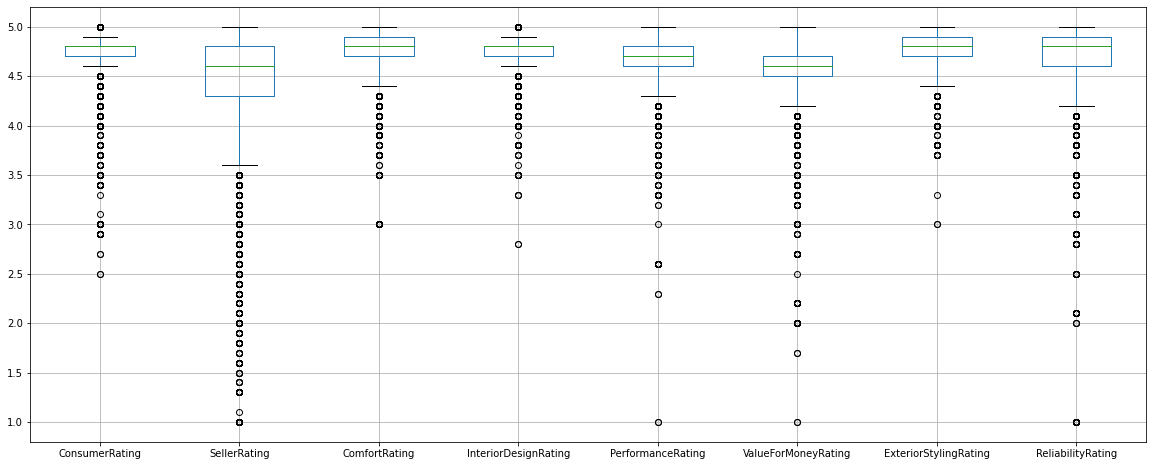

In [ ]:
num_rawdata[['ConsumerRating', 'SellerRating', 'ComfortRating', 'InteriorDesignRating', 'PerformanceRating', 
             'ValueForMoneyRating', 'ExteriorStylingRating', 'ReliabilityRating']].boxplot(figsize=(20, 8))

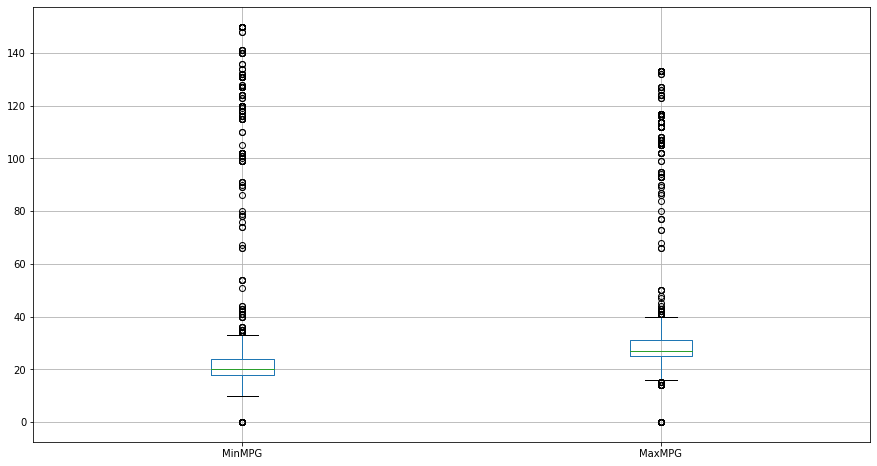

In [ ]:
num_rawdata[['MinMPG', 'MaxMPG']].boxplot(figsize=(15, 8))

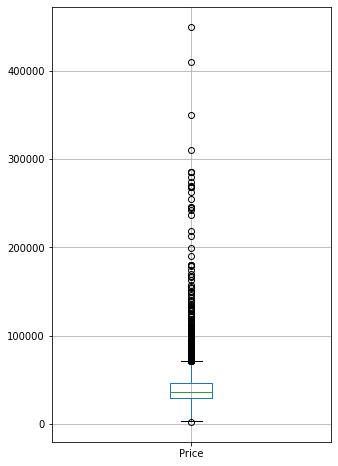

In [ ]:
num_rawdata.boxplot(column=['Price'], return_type='axes', figsize=(5, 8));

## Análisis Exploratorio

### Descripción de las Variables

In [ ]:
#rawdata.info() #si se quiere ver la cantidad de datos, el tipo de dato por columna, y el peso del archivo
print(rawdata[['SellerName', 'State', 'Make']].value_counts()[:5])# el vendedor que vendio mas vehiculos de una sola marca (el estado es info adicional)
print('\n')
rawdata[['Make', 'Model']].value_counts()[:5] # el modelo del vehiculo y la marca que mas se vendio

SellerName                        State  Make         
Principle Volvo Cars San Antonio  TX     Volvo            25
Autos of Dallas                   TX     BMW              18
Mercedes-Benz of Miami            FL     Mercedes-Benz    15
BMW of Alexandria                 VA     BMW              14
Toyota of Dallas                  TX     Toyota           14
dtype: int64




Make      Model                 
Jeep      Grand Cherokee Limited    266
Honda     CR-V EX-L                 189
BMW       X5 xDrive40i              164
Cadillac  XT5 Luxury                142
Toyota    RAV4 LE                   112
dtype: int64

In [ ]:
rawdata.describe() #Solo valores numericos

,Year,Price,ConsumerRating,ConsumerReviews,SellerRating,SellerReviews,ComfortRating,InteriorDesignRating,PerformanceRating,ValueForMoneyRating,ExteriorStylingRating,ReliabilityRating,MinMPG,MaxMPG,Mileage
count,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000,9379.000000
mean,2018.721719,39829.922806,4.702825,133.187014,4.412571,984.089988,4.771895,4.727391,4.696290,4.537083,4.782194,4.681746,22.755411,29.216548,37463.023350
std,2.221708,20790.569384,0.240795,154.985640,0.626258,1609.039864,0.217822,0.194391,0.253664,0.338098,0.171537,0.368161,14.812869,12.809783,24970.342569
min,2001.000000,2300.000000,2.500000,1.000000,1.000000,1.000000,3.000000,2.800000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,121.000000
25%,2018.000000,28993.500000,4.700000,30.000000,4.300000,112.000000,4.700000,4.700000,4.600000,4.500000,4.700000,4.600000,18.000000,25.000000,18666.500000
50%,2019.000000,35999.000000,4.800000,75.000000,4.600000,542.000000,4.800000,4.800000,4.700000,4.600000,4.800000,4.800000,20.000000,27.000000,32907.000000
75%,2020.000000,45997.000000,4.800000,182.000000,4.800000,1272.000000,4.900000,4.800000,4.800000,4.700000,4.900000,4.900000,24.000000,31.000000,47698.000000
max,2022.000000,449996.000000,5.000000,817.000000,5.000000,27824.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,150.000000,133.000000,234114.000000


In [ ]:
rawdata.describe(include=['object']) #solo valores categoricos (object ya que ese es su datatype)

,Make,Model,Used/New,SellerType,SellerName,StreetName,State,Zipcode,DealType,ExteriorColor,InteriorColor,Drivetrain,FuelType,Transmission,Engine,VIN,Stock#
count,9379,9379,9379,9379,9379,9379,9379,9379,9157,9379,9379,9379,9379,9379,9379,9379,9379
unique,41,1304,2,2,3971,3967,58,2163,3,949,374,9,13,93,326,8474,8431
top,BMW,Grand Cherokee Limited,Used,Dealer,EchoPark Automotive Greenville,2930 Laurens Rd Greenville,TX,76051,Good,Black,Black,All-wheel Drive,Gasoline,8-Speed Automatic,2.0L I4 16V GDI DOHC Turbo,JHLRW2H8XKX023259,–
freq,944,266,7900,9339,36,36,1225,69,5524,897,3758,4480,8905,3202,1629,3,40


In [ ]:
rawdata.nlargest(5, 'Price')[['Year', 'Make', 'Model', 'Used/New', 'Price', 'State']] #Los 5 vehiculos mas costosos

,Year,Make,Model,Used/New,Price,State
7943,2020,Mercedes-Benz,AMG G 63 Base,Used,449996,NC
2888,2017,Mercedes-Benz,G-Class G 550,Used,409999,Suite
1626,2013,Lamborghini,Aventador LP700-4,Used,349995,MO
2181,2022,Porsche,911 GT3,Used,309888,TX
2060,2020,Lamborghini,Urus Base,Used,285000,NJ


In [ ]:
rawdata.nsmallest(5, 'Price')[['Year', 'Make', 'Model', 'Used/New', 'Price', 'State']] #Los 5 vehiculos mas baratos

,Year,Make,Model,Used/New,Price,State
2593,2006,Chevrolet,Impala LT,Used,2300,SC
811,2009,Ford,Focus SE,Used,3995,NY
6060,2004,Hyundai,Elantra GLS,Used,3995,SC
424,2003,Lexus,ES 300 Base (A5),Used,3999,FL
1048,2015,Chrysler,200 Limited,Used,4250,TX


### Gráficas de Densidad

Gráfica de densidad de la variable Price:

(0.0, 449996.0)

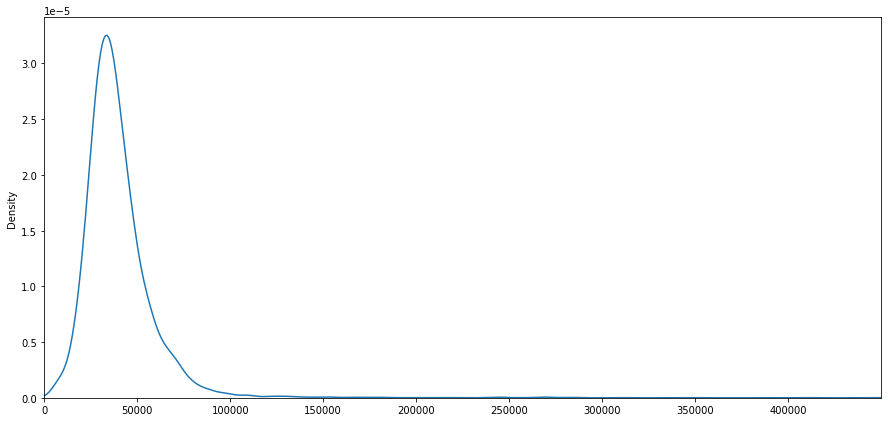

In [ ]:
dataclean[['Price']].plot.kde(figsize=(15,7), legend=False)
plt.ylim(0)
plt.xlim(0, np.max(dataclean['Price']))

### Histogramas

Se usa un histograma para mirar la cantidad de vehículos que se vendieron por concesionaria y por estado. De esto, se observa que los vehículos BMW fueron lo más vendidos mientras que vehículos como Ferraris fueron los menos vendidos. Mientras que, para los estados de USA, el estado de Texas fue donde más se vendieron vehículos y Alaska fue uno de los estados donde menos se vendió.

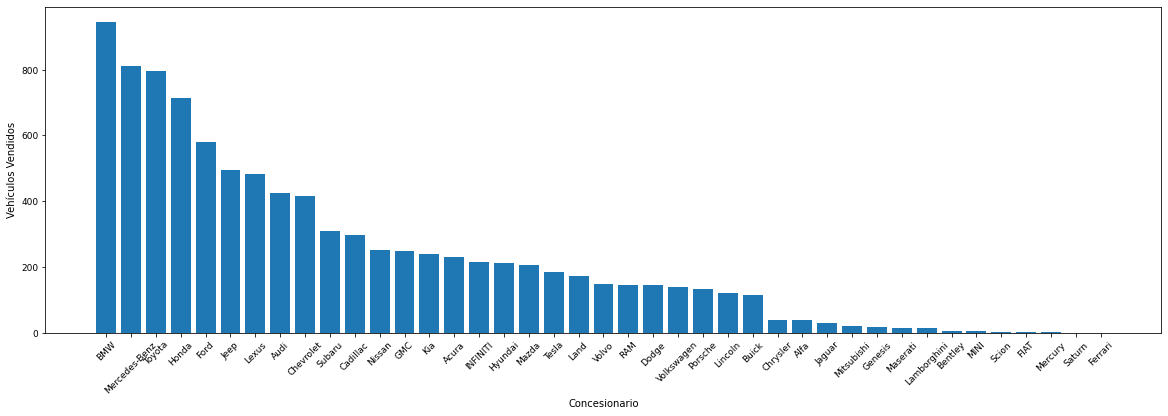

In [ ]:
drd = rawdata['Make'].value_counts().to_dict()
names = list(drd.keys())
values = list(drd.values())

fig, ax = plt.subplots(figsize=(20, 6))
plt.bar(range(len(drd)), values, tick_label=names)
plt.xticks(rotation = 45)
plt.xlabel('Concesionario', fontsize=10)
plt.ylabel('Vehículos Vendidos', fontsize=10)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(9)
plt.show()

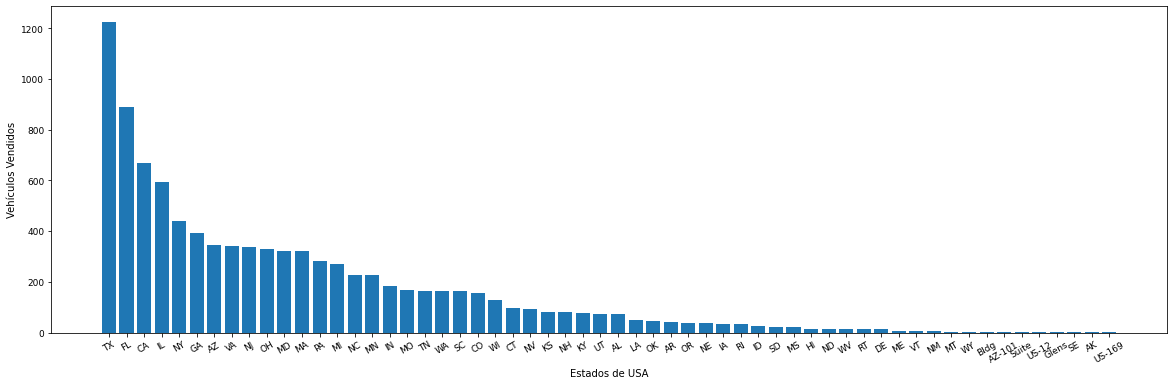

In [ ]:
drd = rawdata['State'].value_counts().to_dict()
names = list(drd.keys())
values = list(drd.values())

fig, ax = plt.subplots(figsize=(20, 6))
plt.bar(range(len(drd)), values, tick_label=names)
plt.xticks(rotation = 30)
plt.xlabel('Estados de USA', fontsize=10)
plt.ylabel('Vehículos Vendidos', fontsize=10)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(9)
plt.show()

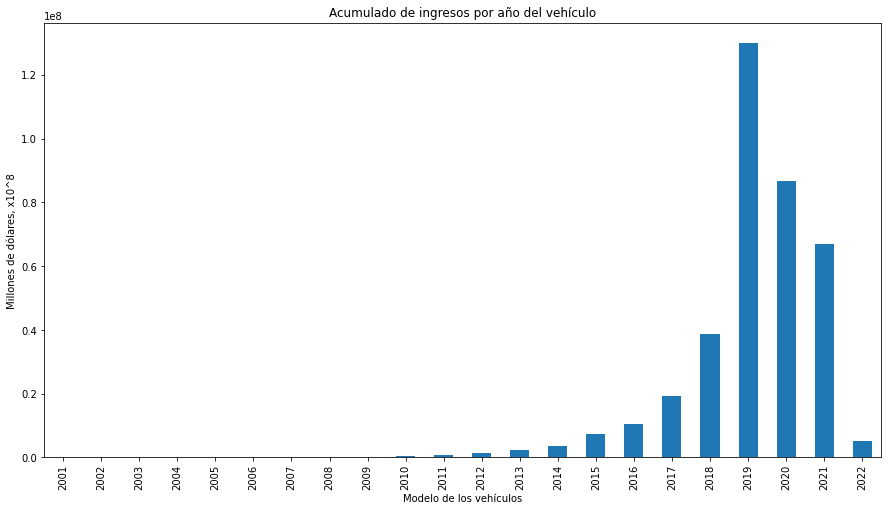

In [ ]:
rawdata.groupby('Year')['Price'].sum().plot.bar(figsize=(15, 8))
plt.title('Acumulado de ingresos por año del vehículo')
plt.xlabel('Modelo de los vehículos')
plt.ylabel('Millones de dólares, x10^8')
plt.show()

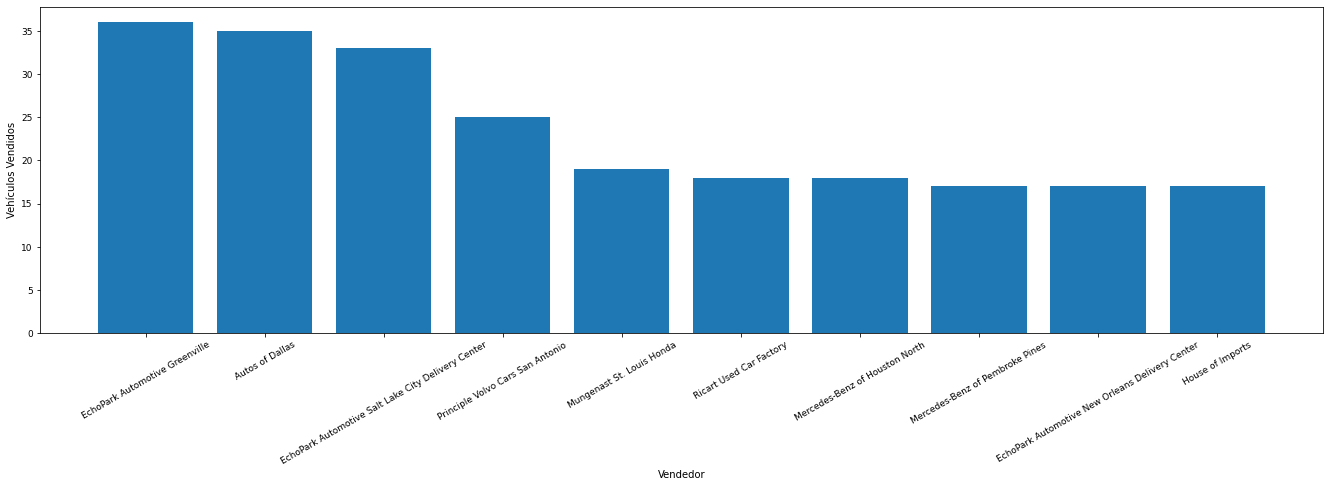

In [ ]:
drd = rawdata['SellerName'].value_counts()[:10].to_dict()
names = list(drd.keys())
values = list(drd.values())

fig, ax = plt.subplots(figsize=(23, 6))
plt.bar(range(len(drd)), values, tick_label=names)
plt.xticks(rotation = 30)
plt.xlabel('Vendedor', fontsize=10)
plt.ylabel('Vehículos Vendidos', fontsize=10)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(9)
plt.show()

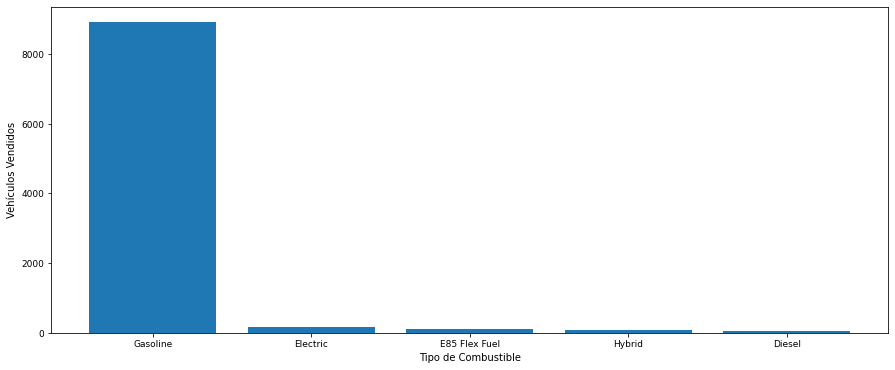

In [ ]:
drd = rawdata['FuelType'].value_counts()[:5].to_dict()
names = list(drd.keys())
values = list(drd.values())

fig, ax = plt.subplots(figsize=(15, 6))
plt.bar(range(len(drd)), values, tick_label=names)
plt.xlabel('Tipo de Combustible', fontsize=10)
plt.ylabel('Vehículos Vendidos', fontsize=10)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(9)
plt.show()

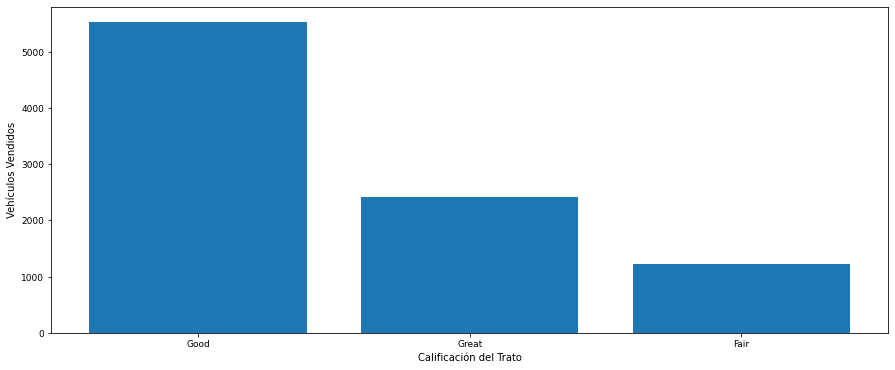

In [ ]:
drd = rawdata['DealType'].value_counts().to_dict()
names = list(drd.keys())
values = list(drd.values())

fig, ax = plt.subplots(figsize=(15, 6))
plt.bar(range(len(drd)), values, tick_label=names)
plt.xlabel('Calificación del Trato', fontsize=10)
plt.ylabel('Vehículos Vendidos', fontsize=10)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(9)
plt.show()

## Preprocesamiento

### Eliminación de Duplicados

In [ ]:
print('Numero de registros antes de eliminar duplicados = %d' % (rawdata.shape[0]))
dataclean = rawdata.drop_duplicates()
print('Numero de registros despues de eliminar duplicados = %d' % (dataclean.shape[0]))

Numero de registros antes de eliminar duplicados = 9379
Numero de registros despues de eliminar duplicados = 8507


### Normalización

In [ ]:
numclean = dataclean[['Year', 'Price', 'ConsumerRating', 'ConsumerReviews', 'SellerRating', 'SellerReviews', 'ComfortRating', 'InteriorDesignRating',
                       'PerformanceRating', 'ValueForMoneyRating', 'ExteriorStylingRating', 'ReliabilityRating', 'MinMPG', 'MaxMPG', 'Mileage']]

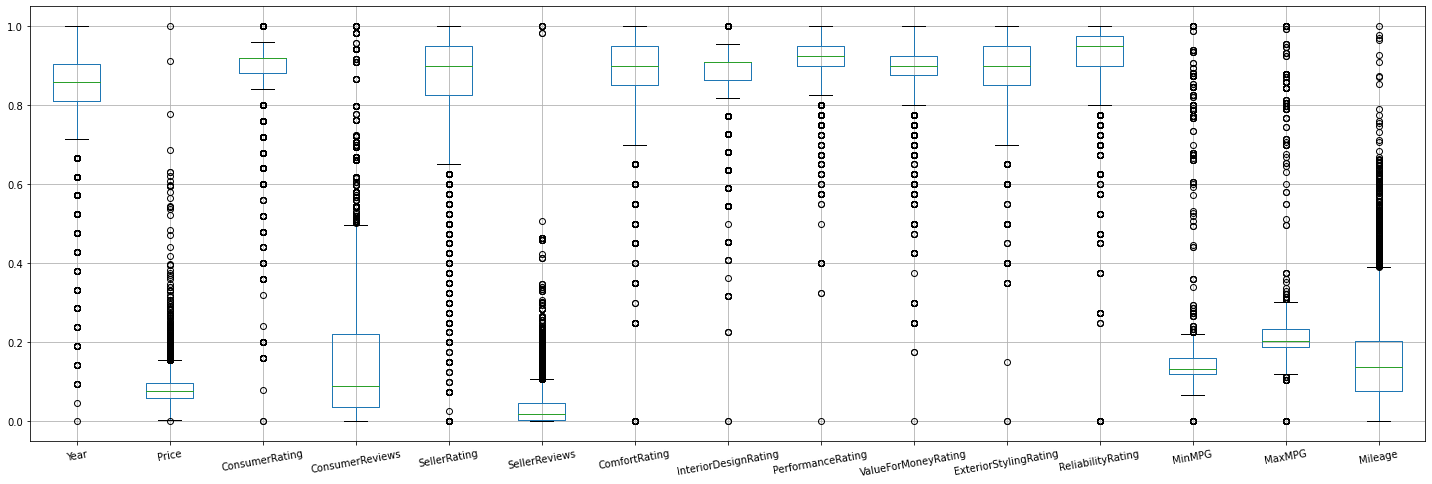

In [ ]:
numclean.apply(lambda x: (x-x.min())/(x.max()-x.min())).boxplot(figsize=(25, 8))
plt.xticks(rotation=10)
plt.show()

### Outliers usando medias y varianzas

In [ ]:
ndata = ['Year', 'Price', 'ConsumerRating', 'ConsumerReviews', 'SellerRating', 'SellerReviews', 'ComfortRating', 'InteriorDesignRating',
                       'PerformanceRating', 'ValueForMoneyRating', 'ExteriorStylingRating', 'ReliabilityRating', 'MinMPG', 'MaxMPG', 'Mileage']

def umbral(x, mean, var, num=2):
  if x >= (mean + num*var) or x <= (mean - num*var):
    return True
  else:
    return False

for data in ndata:
  out = numclean[data].apply(lambda x: umbral(x, numclean[data].mean(), numclean[data].var()))
  print('Para la variable {}, hay {} outliers por el método de media y dos desviaciones estandar'.format(data, out.sum()))

Para la variable Year, hay 60 outliers por el método de media y dos desviaciones estandar
Para la variable Price, hay 0 outliers por el método de media y dos desviaciones estandar
Para la variable ConsumerRating, hay 2499 outliers por el método de media y dos desviaciones estandar
Para la variable ConsumerReviews, hay 0 outliers por el método de media y dos desviaciones estandar
Para la variable SellerRating, hay 801 outliers por el método de media y dos desviaciones estandar
Para la variable SellerReviews, hay 0 outliers por el método de media y dos desviaciones estandar
Para la variable ComfortRating, hay 4464 outliers por el método de media y dos desviaciones estandar
Para la variable InteriorDesignRating, hay 3881 outliers por el método de media y dos desviaciones estandar
Para la variable PerformanceRating, hay 3160 outliers por el método de media y dos desviaciones estandar
Para la variable ValueForMoneyRating, hay 2612 outliers por el método de media y dos desviaciones estandar


In [ ]:
for data in ndata:
  out = numclean[data].apply(lambda x: umbral(x, numclean[data].mean(), numclean[data].std(), num=3))
  print('Para la variable {}, hay {} outliers por el método de media y tres desviaciones estandar'.format(data, out.sum()))

Para la variable Year, hay 196 outliers por el método de media y tres desviaciones estandar
Para la variable Price, hay 89 outliers por el método de media y tres desviaciones estandar
Para la variable ConsumerRating, hay 128 outliers por el método de media y tres desviaciones estandar
Para la variable ConsumerReviews, hay 147 outliers por el método de media y tres desviaciones estandar
Para la variable SellerRating, hay 235 outliers por el método de media y tres desviaciones estandar
Para la variable SellerReviews, hay 151 outliers por el método de media y tres desviaciones estandar
Para la variable ComfortRating, hay 203 outliers por el método de media y tres desviaciones estandar
Para la variable InteriorDesignRating, hay 175 outliers por el método de media y tres desviaciones estandar
Para la variable PerformanceRating, hay 105 outliers por el método de media y tres desviaciones estandar
Para la variable ValueForMoneyRating, hay 197 outliers por el método de media y tres desviacione

### Discretización Price

In [ ]:
lbl = ['Economico', 'Precio Justo', 'Costoso', 'Muy Costoso']
pricecut = pd.cut(numclean['Price'], 4)
priceqcut = pd.qcut(numclean['Price'], 4)
pc = numclean['Price'].copy()
pqc = numclean['Price'].copy()
pc['Price'] = pricecut.cat.codes
pqc['Price'] = priceqcut.cat.codes
pc = pc['Price'].apply(lambda x: lbl[x])
pqc = pqc['Price'].apply(lambda x: lbl[x])

In [ ]:
pricecut

0       (1852.304, 114224.0]
1       (1852.304, 114224.0]
2       (1852.304, 114224.0]
3       (1852.304, 114224.0]
4       (1852.304, 114224.0]
                ...         
9373    (1852.304, 114224.0]
9374    (1852.304, 114224.0]
9376    (1852.304, 114224.0]
9377    (1852.304, 114224.0]
9378    (1852.304, 114224.0]
Name: Price, Length: 8507, dtype: category
Categories (4, interval[float64, right]): [(1852.304, 114224.0] < (114224.0, 226148.0] <
                                           (226148.0, 338072.0] < (338072.0, 449996.0]]

In [ ]:
priceqcut

0        (36190.0, 45998.5]
1       (45998.5, 449996.0]
2        (36190.0, 45998.5]
3       (2299.999, 28994.0]
4       (45998.5, 449996.0]
               ...         
9373     (28994.0, 36190.0]
9374    (2299.999, 28994.0]
9376    (2299.999, 28994.0]
9377    (2299.999, 28994.0]
9378     (28994.0, 36190.0]
Name: Price, Length: 8507, dtype: category
Categories (4, interval[float64, right]): [(2299.999, 28994.0] < (28994.0, 36190.0] <
                                           (36190.0, 45998.5] < (45998.5, 449996.0]]

In [ ]:
pc.value_counts(), pqc.value_counts()

(Economico       8441
 Precio Justo      47
 Costoso           16
 Muy Costoso        3
 dtype: int64, Economico       2129
 Muy Costoso     2127
 Costoso         2126
 Precio Justo    2125
 dtype: int64)

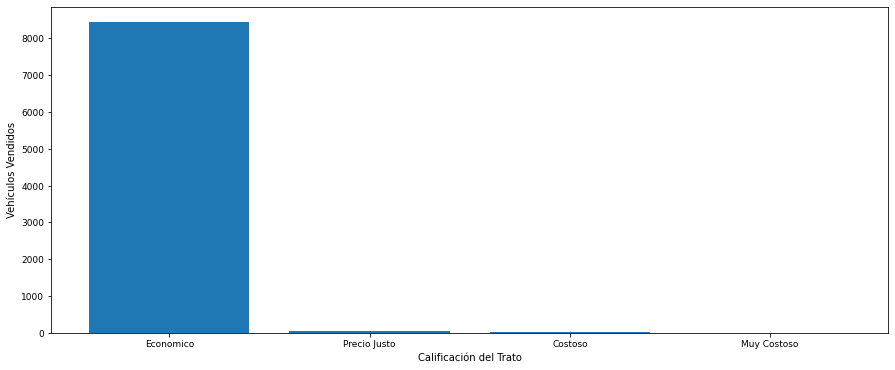

In [ ]:
pcd = pc.value_counts().to_dict()
names = list(pcd.keys())
values = list(pcd.values())

fig, ax = plt.subplots(figsize=(15, 6))
plt.bar(range(len(pcd)), values, tick_label=names)
plt.xlabel('Calificación del Trato', fontsize=10)
plt.ylabel('Vehículos Vendidos', fontsize=10)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(9)
plt.show()

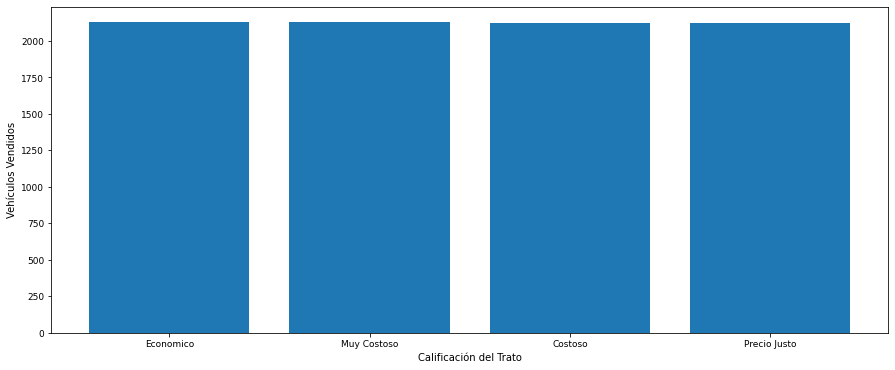

In [ ]:
pqcd = pqc.value_counts().to_dict()
names = list(pqcd.keys())
values = list(pqcd.values())

fig, ax = plt.subplots(figsize=(15, 6))
plt.bar(range(len(pqcd)), values, tick_label=names)
plt.xlabel('Calificación del Trato', fontsize=10)
plt.ylabel('Vehículos Vendidos', fontsize=10)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(9)
plt.show()

### Discretización Mileage

In [ ]:
mileagecut, binmc = pd.cut(numclean['Mileage'], 5, retbins=True)
mileageqcut, binmqc = pd.qcut(numclean['Mileage'], 5, retbins=True)
mc = numclean['Mileage'].copy()
mqc = numclean['Mileage'].copy()
mc['Mileage'] = mileagecut.cat.codes
mqc['Mileage'] = mileageqcut.cat.codes
binmc = [i if i>= 0 else 0 for i in binmc]
binmqc = [i if i>= 0 else 0 for i in binmqc]
lblmc = ['({} - {}]'.format(np.round(binmc[i], 2), np.round(binmc[i+1], 2)) for i in range(len(binmc)-1)]
lblmqc = ['({} - {}]'.format(np.round(binmqc[i], 2), np.round(binmqc[i+1], 2)) for i in range(len(binmqc)-1)]
mc = mc['Mileage'].apply(lambda x: lblmc[x])
mqc = mqc['Mileage'].apply(lambda x: lblmqc[x])

In [ ]:
mc.value_counts(), mqc.value_counts()

((0 - 46919.6]            6266
 (46919.6 - 93718.2]      1984
 (93718.2 - 140516.8]      198
 (140516.8 - 187315.4]      50
 (187315.4 - 234114.0]       9
 dtype: int64, (16729.8 - 24368.0]     1703
 (121.0 - 16729.8]       1702
 (49995.4 - 234114.0]    1702
 (37613.6 - 49995.4]     1701
 (24368.0 - 37613.6]     1699
 dtype: int64)

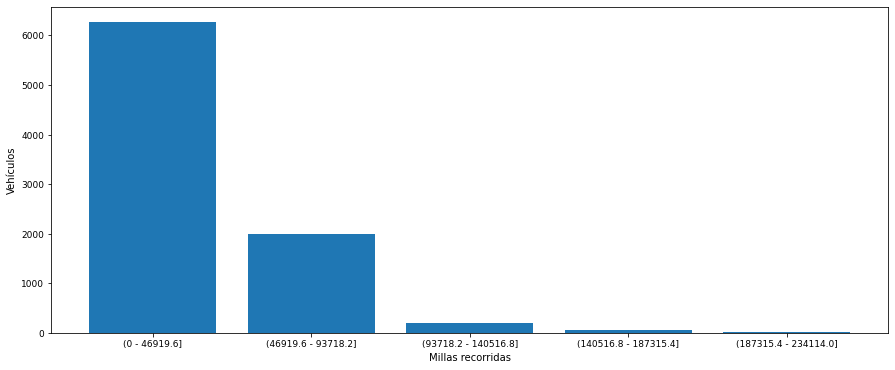

In [ ]:
mcd = mc.value_counts().to_dict()
values = [mcd[i] for i in lblmc]

fig, ax = plt.subplots(figsize=(15, 6))
plt.bar(range(len(mcd)), values, tick_label=lblmc)
plt.xlabel('Millas recorridas', fontsize=10)
plt.ylabel('Vehículos', fontsize=10)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(9)
plt.show()

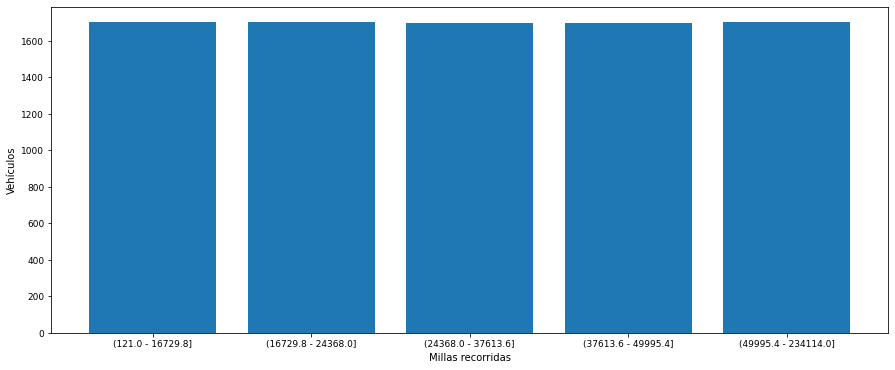

In [ ]:
mqcd = mqc.value_counts().to_dict()
values = [mqcd[i] for i in lblmqc]

fig, ax = plt.subplots(figsize=(15, 6))
plt.bar(range(len(mqcd)), values, tick_label=lblmqc)
plt.xlabel('Millas recorridas', fontsize=10)
plt.ylabel('Vehículos', fontsize=10)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(9)
plt.show()

### Ranking por medias y varianzas (variables numéricas)

In [ ]:
num_rawdata["DealType"] = rawdata["DealType"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
rankingbasepd = num_rawdata.dropna()
rankingbasenp = rankingbasepd.to_numpy()

In [ ]:
E = rankingbasenp[:,:-1]
ind = rankingbasenp[:,-1]

ind_gr = ind=='Great'
ind_go = ind=='Good'
ind_fa = ind=='Fair'

E_0 = E[ind_gr]
E_1 = E[ind_go]
E_2 = E[ind_fa]

In [ ]:
testvals = np.zeros(E.shape[1])

for i in range(E.shape[1]):
    SE = np.sqrt( np.var(E_0[:,i])/E_0.shape[0] + np.var(E_1[:,i])/E_1.shape[0] + np.var(E_2[:,i])/E_2.shape[0] )
    means = [np.mean(E_0[:,i]), np.mean(E_1[:,i]), np.mean(E_2[:,i])]
    testvals[i] = (np.max(means)-np.min(means)) / SE

varorder = np.argsort(testvals)

print(f"Los coeficientes de las variables son {dict(zip(rankingbasepd.columns, np.round(testvals, 4)))}")
print(f"El ranking de las dimensiones según las medias y varianzas (en orden ascendente) es {[rankingbasepd.columns[i] for i in varorder]}.")

Los coeficientes de las variables son {'Year': 11.4196, 'Price': 9.9261, 'ConsumerRating': 1.7963, 'ConsumerReviews': 7.3178, 'SellerRating': 3.1371, 'SellerReviews': 1.56, 'ComfortRating': 0.8854, 'InteriorDesignRating': 1.6531, 'PerformanceRating': 3.1947, 'ValueForMoneyRating': 4.3602, 'ExteriorStylingRating': 1.2274, 'ReliabilityRating': 2.0202, 'MinMPG': 4.4763, 'MaxMPG': 3.9029, 'Mileage': 9.9958, 'CarRating': 1.7005}
El ranking de las dimensiones según las medias y varianzas (en orden ascendente) es ['ComfortRating', 'ExteriorStylingRating', 'SellerReviews', 'InteriorDesignRating', 'CarRating', 'ConsumerRating', 'ReliabilityRating', 'SellerRating', 'PerformanceRating', 'MaxMPG', 'ValueForMoneyRating', 'MinMPG', 'ConsumerReviews', 'Price', 'Mileage', 'Year'].


### Análisis de Componentes Principales (PCA)

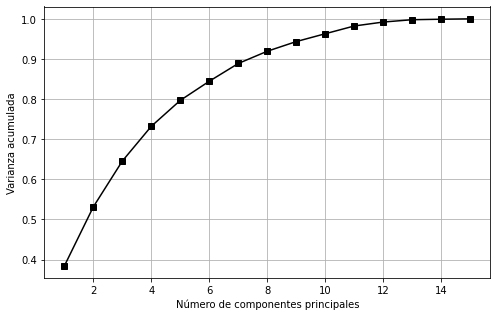

In [ ]:
scalar = StandardScaler()
ndata_scaled = pd.DataFrame(scalar.fit_transform(numclean), columns=numclean.columns)
ndata_scaled.drop(["CarRating"], axis=1, inplace=True)

pca = PCA()
numd_pca = pd.DataFrame(pca.fit_transform(ndata_scaled))

numpca = pca.explained_variance_ratio_
plt.figure(figsize = (8,5))
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza acumulada')

cum_var_exp = np.cumsum(numpca)
nc = np.arange(1, numpca.shape[0] + 1)
plt.plot(nc, cum_var_exp, '-ks')
plt.grid()


In [ ]:
comps = np.round(pca.components_, 3)

print(f"Los componentes principales obtenidos son:")
for comp in comps:
    print(f"- {[ str(comp[i])+'*'+numclean.columns[i] for i in range(len(comp)) ]}")

Los componentes principales obtenidos son:
- ['-0.051*Year', '0.041*Price', '-0.408*ConsumerRating', '-0.032*ConsumerReviews', '-0.022*SellerRating', '-0.021*SellerReviews', '-0.371*ComfortRating', '-0.347*InteriorDesignRating', '-0.32*PerformanceRating', '-0.373*ValueForMoneyRating', '-0.354*ExteriorStylingRating', '-0.366*ReliabilityRating', '0.191*MinMPG', '0.178*MaxMPG', '0.029*Mileage']
- ['-0.524*Year', '-0.383*Price', '-0.021*ConsumerRating', '0.22*ConsumerReviews', '-0.102*SellerRating', '-0.065*SellerReviews', '-0.018*ComfortRating', '-0.126*InteriorDesignRating', '-0.158*PerformanceRating', '0.047*ValueForMoneyRating', '-0.051*ExteriorStylingRating', '0.044*ReliabilityRating', '-0.322*MinMPG', '-0.308*MaxMPG', '0.518*Mileage']
- ['0.16*Year', '0.349*Price', '-0.105*ConsumerRating', '-0.245*ConsumerReviews', '0.075*SellerRating', '0.008*SellerReviews', '-0.005*ComfortRating', '0.031*InteriorDesignRating', '-0.196*PerformanceRating', '-0.18*ValueForMoneyRating', '0.054*Exterior

## Nuevas Variables

In [ ]:
dataclean.corr()

,Year,Price,ConsumerRating,ConsumerReviews,SellerRating,SellerReviews,ComfortRating,InteriorDesignRating,PerformanceRating,ValueForMoneyRating,ExteriorStylingRating,ReliabilityRating,MinMPG,MaxMPG,Mileage
Year,1.000000,0.323839,0.094654,-0.136601,0.093430,0.063440,0.147211,0.215065,0.119166,0.040347,0.137152,0.018750,0.116035,0.102419,-0.661571
Price,0.323839,1.000000,-0.110179,-0.302986,0.042620,-0.017937,-0.095496,0.071263,0.032500,-0.258259,0.005895,-0.177900,0.051119,-0.008017,-0.347495
ConsumerRating,0.094654,-0.110179,1.000000,0.075845,0.037375,0.033194,0.864838,0.785122,0.801719,0.917302,0.802524,0.914235,-0.332032,-0.295715,-0.054888
ConsumerReviews,-0.136601,-0.302986,0.075845,1.000000,0.007069,0.069314,0.040904,0.017219,-0.042057,0.160977,0.016991,0.105626,-0.021684,-0.007741,0.117436
SellerRating,0.093430,0.042620,0.037375,0.007069,1.000000,0.279516,0.040826,0.042752,0.033157,0.029936,0.030437,0.025369,-0.019014,-0.025320,-0.084671
SellerReviews,0.063440,-0.017937,0.033194,0.069314,0.279516,1.000000,0.040234,0.038022,0.022738,0.034592,0.033978,0.024224,-0.001895,-0.002658,-0.061356
ComfortRating,0.147211,-0.095496,0.864838,0.040904,0.040826,0.040234,1.000000,0.770030,0.628867,0.748462,0.671408,0.763585,-0.372004,-0.352065,-0.059998
InteriorDesignRating,0.215065,0.071263,0.785122,0.017219,0.042752,0.038022,0.770030,1.000000,0.652342,0.639526,0.764036,0.583641,-0.293651,-0.268408,-0.136279
PerformanceRating,0.119166,0.032500,0.801719,-0.042057,0.033157,0.022738,0.628867,0.652342,1.000000,0.666483,0.629422,0.655136,-0.057859,-0.041820,-0.098394
ValueForMoneyRating,0.040347,-0.258259,0.917302,0.160977,0.029936,0.034592,0.748462,0.639526,0.666483,1.000000,0.694446,0.893161,-0.288450,-0.246927,-0.009207


Al revisar las correlaciones que hay entre las variables, se opta por crear una nuerva variable 'CarRating', siendo el ponderado de los ratings del vehículo, ya que estas variables muestran una gran correlación. Posteriormente, se mira la correlación entre esta nueva variable CarRating con Price y ConsumerRating.

In [ ]:
dataclean['CarRating'] = (dataclean['ComfortRating'] + dataclean['InteriorDesignRating'] + dataclean['PerformanceRating'] + 
                        dataclean['ValueForMoneyRating'] + dataclean['ExteriorStylingRating'] + dataclean['ReliabilityRating'])/6

dataclean[['Price', 'ConsumerRating', 'CarRating']].corr()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Price,ConsumerRating,CarRating
Price,1.000000,-0.110179,-0.112104
ConsumerRating,-0.110179,1.000000,0.988940
CarRating,-0.112104,0.988940,1.000000


Se ve poca correlación entre los ratings y la variable price, pero, la correlación es alta entre los ratings. 

Luego, se observa las distribuciones de los ratings y el precio.

(0.0, 7.0)

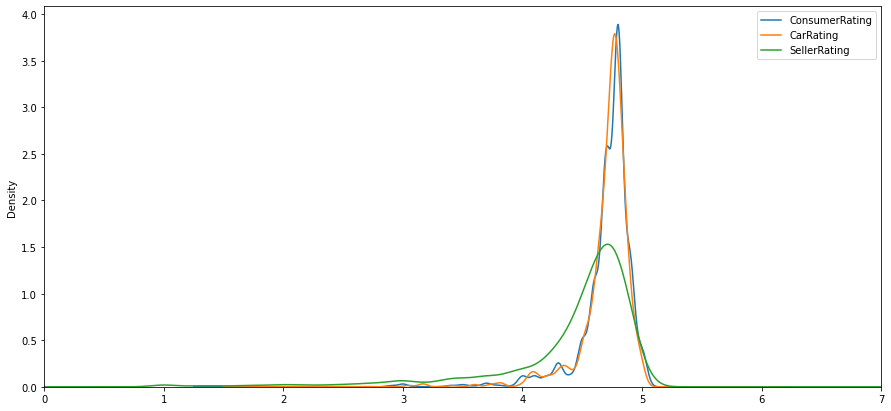

In [ ]:
dataclean[['ConsumerRating', 'CarRating', 'SellerRating']].plot.kde(figsize=(15,7))
plt.ylim(0)
plt.xlim(0, 7)

In [ ]:
dataclean['CarRating'].describe()

count    8507.000000
mean        4.698783
std         0.224466
min         2.666667
25%         4.650000
50%         4.750000
75%         4.816667
max         5.000000
Name: CarRating, dtype: float64

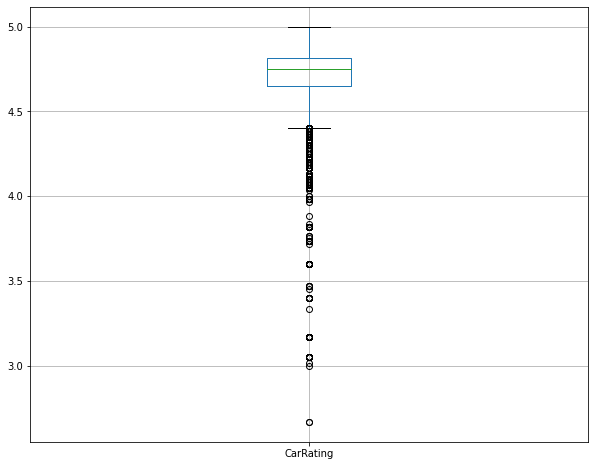

In [ ]:
dataclean[['CarRating']].boxplot(figsize=(10,8))

Finalmente, se observa la relaciones entre las variables Price, CarRating y ConsumerRating discretizado por la concesionaria.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


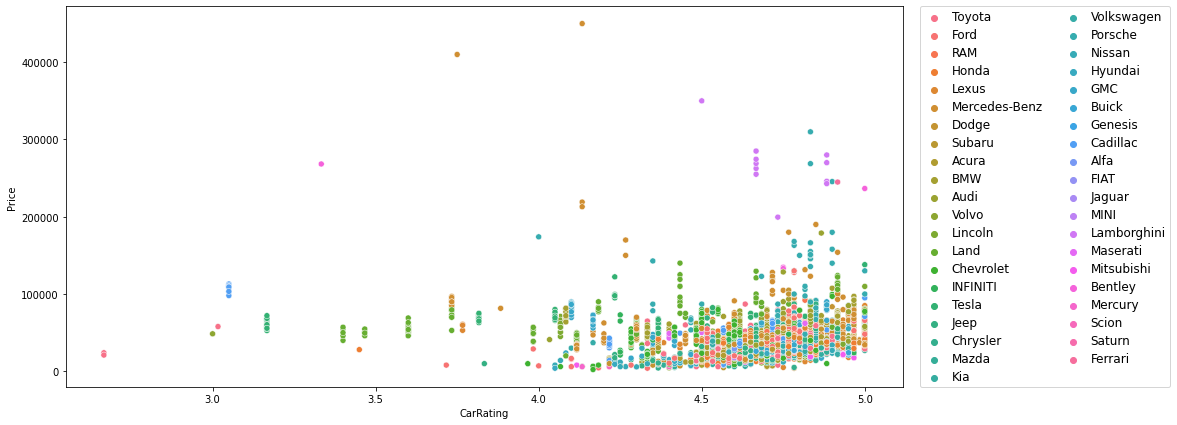

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.scatterplot('CarRating', 'Price', data=dataclean, hue='Make')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, ncol=2)
plt.setp(ax.get_legend().get_texts(), fontsize='12')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


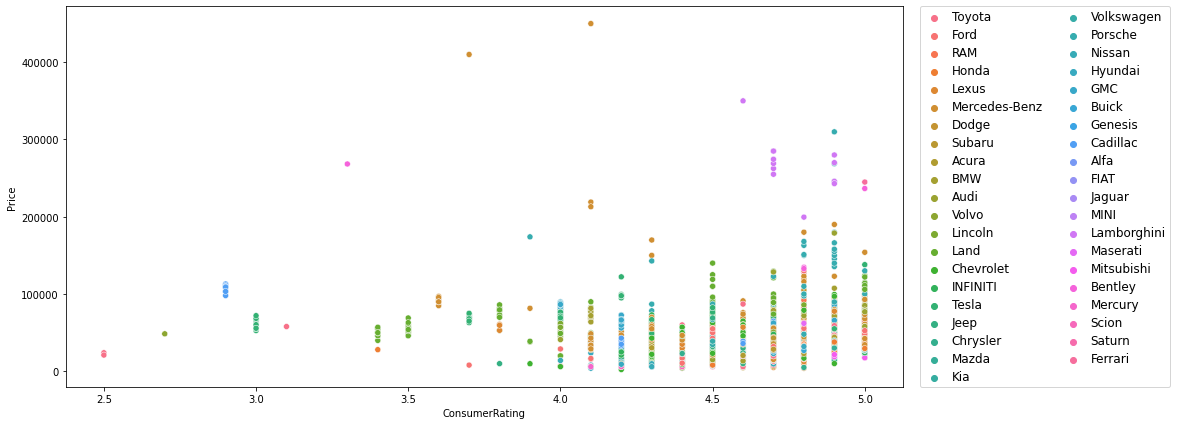

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.scatterplot('ConsumerRating', 'Price', data=dataclean, hue='Make')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, ncol=2)
plt.setp(ax.get_legend().get_texts(), fontsize='12')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


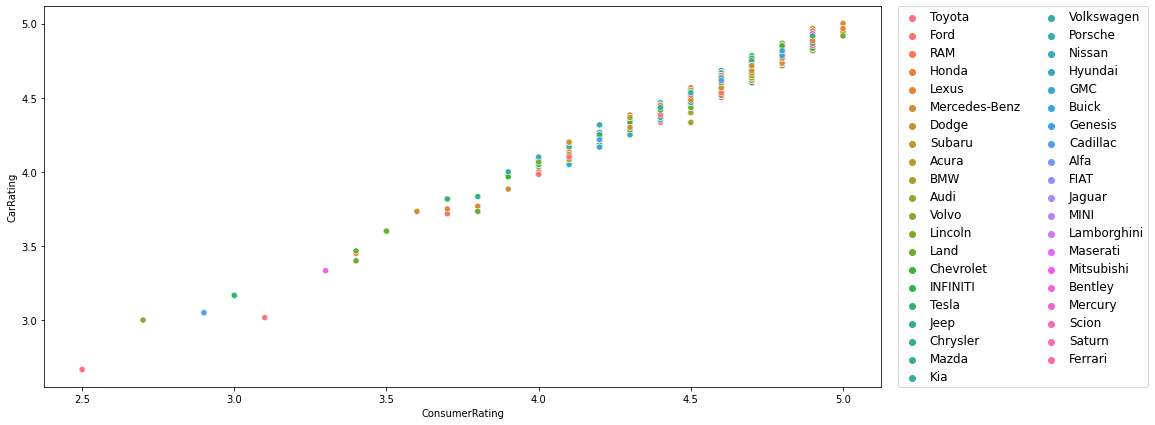

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.scatterplot('ConsumerRating', 'CarRating', data=dataclean, hue='Make')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, ncol=2)
plt.setp(ax.get_legend().get_texts(), fontsize='12')
plt.show()

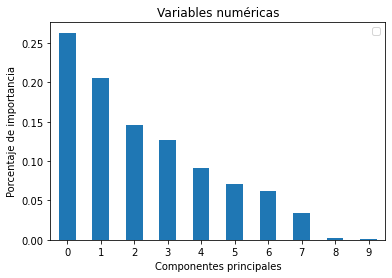

In [ ]:
numdataclean = dataclean[['Year', 'Price', 'ConsumerRating', 'ConsumerReviews', 'SellerRating', 'SellerReviews', 'MinMPG', 'MaxMPG', 'Mileage', 'CarRating']]

scalar = StandardScaler()
ndata_scaled = pd.DataFrame(scalar.fit_transform(numdataclean), columns=numdataclean.columns)

pca = PCA()
numd_pca = pd.DataFrame(pca.fit_transform(ndata_scaled))

numpca = pd.DataFrame(pca.explained_variance_ratio_)
numpca.plot.bar()
plt.legend('')
plt.title('Variables numéricas')
plt.xlabel('Componentes principales')
plt.xticks(rotation=0)
plt.ylabel('Porcentaje de importancia');